## Restaurant Reviews


### Problem Statement: Build a model which understands the review description and classifies whether it is a good restaurant or bad restaurant

## Load the Dataset

In [91]:
from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
import os
os.chdir('E:/Sindhura/Datasets')

In [93]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Data Cleaning - Perform basic data quality checks

In [95]:
df.shape

(1000, 2)

In [96]:
# checking for missing values
df.isna().sum()

Review    0
Liked     0
dtype: int64

## Data Pre-Processing

### Data Extraction using TFIDF Vectorizer
TFIDF(Term Frequency Inverse Document Frequency) is a statistical formula to convert text documents to vectors based on relevance of the word

### Removing any special characters or numbers from the column.

In [97]:
import re 
df['Review'] = df['Review'].str.lower()
pattern = r'[^a-z\s]'
df['Review'] = df['Review'].replace(pattern,'',regex=True)
df['Review']

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review, Length: 1000, dtype: object

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =  TfidfVectorizer()

X = tfidf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
X.shape

(1000, 2046)

In [100]:
Y = df[['Liked']]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [101]:
Y.dtypes

Liked    int64
dtype: object

## Split the dataset into train and test inorder to avoid overfitting model

In [102]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=21)

In [103]:
xtrain.shape

(800, 2046)

In [104]:
xtest.shape

(200, 2046)

In [105]:
ytrain.shape

(800, 1)

In [106]:
ytest.shape

(200, 1)

## Building Neural Network model to perform sentiment analysis

In [107]:
pip install keras tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [108]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [109]:
# Initialize the model
model = Sequential()

# Add the first layer
model.add(Dense(256,input_dim=xtrain.shape[1],activation='relu'))
model.add(Dropout(0.5))

# Add another layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# Add Output layer
model.add(Dense(1,activation='sigmoid'))


In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               524032    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Early Stopping is a form of regularization which helps the learning model from overfitting.

Paramters used - 

Monitor : We want to monitor validation loss 

Patience : It is set to 10 here, it means that the training will terminate the model only if there is no improvement in the monitor performance for 10 epochs/iterations


In [111]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [112]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [113]:
hist = model.fit(xtrain,ytrain,
                 validation_split=0.2,
                 batch_size=8,
                 epochs=100,
                 callbacks=[early_stop])

Epoch 1/100
80/80 [==============================] - 3s 20ms/step - loss: 0.2484 - accuracy: 0.5359 - val_loss: 0.2454 - val_accuracy: 0.5063
Epoch 2/100
80/80 [==============================] - 1s 13ms/step - loss: 0.2109 - accuracy: 0.7219 - val_loss: 0.1885 - val_accuracy: 0.8000
Epoch 3/100
80/80 [==============================] - 1s 15ms/step - loss: 0.0948 - accuracy: 0.9047 - val_loss: 0.1545 - val_accuracy: 0.7688
Epoch 4/100
80/80 [==============================] - 1s 15ms/step - loss: 0.0274 - accuracy: 0.9766 - val_loss: 0.1580 - val_accuracy: 0.7688
Epoch 5/100
80/80 [==============================] - 1s 13ms/step - loss: 0.0125 - accuracy: 0.9859 - val_loss: 0.1601 - val_accuracy: 0.7688
Epoch 6/100
80/80 [==============================] - 1s 13ms/step - loss: 0.0054 - accuracy: 0.9969 - val_loss: 0.1634 - val_accuracy: 0.7500
Epoch 7/100
80/80 [==============================] - 1s 13ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1767 - val_accuracy: 0.7500
Epoch 

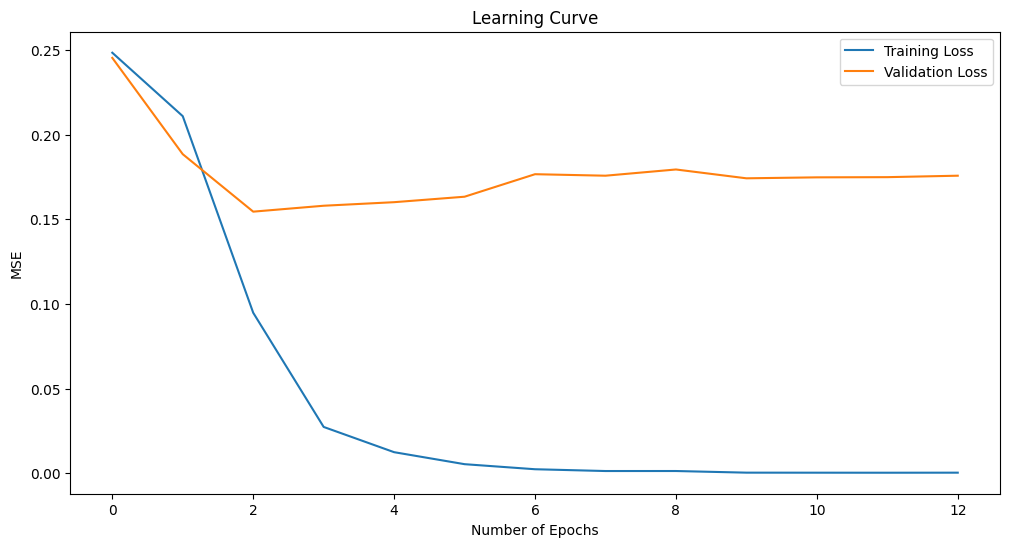

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend()

## Model Evaluation

In [116]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 1s 11ms/step - loss: 0.0352 - accuracy: 0.9500


[0.03518270328640938, 0.949999988079071]

In [117]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 7ms/step - loss: 0.1541 - accuracy: 0.7850


[0.15407128632068634, 0.7850000262260437]

## Model Prediction

In [120]:
yprob_test = model.predict(xtest)
yprob_test[0]

7/7 [==============================] - 0s 5ms/step


array([0.18103123], dtype=float32)

In [122]:
preds =[]
for i in yprob_test:
    if i>=0.5:
        preds.append(1)
    else:
        preds.append(0)
preds[:5]

[0, 0, 1, 1, 1]

## Plot the Confusion matrix and classification report

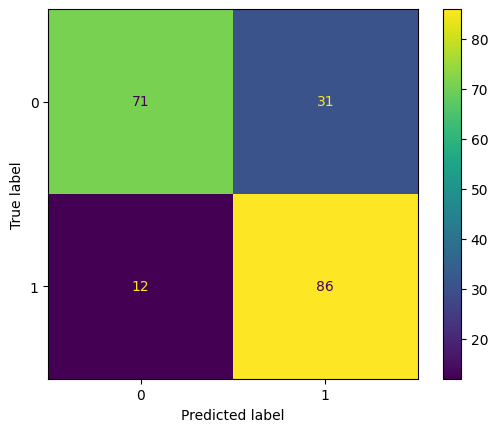

In [123]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

cf = confusion_matrix(ytest,preds)
ConfusionMatrixDisplay(cf).plot()

In [124]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       102
           1       0.74      0.88      0.80        98

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200



### This model is providing f1-score average around 0.79. This is a good model

Predicting a given text

In [125]:
text = input('Enter any review : ')
text = text.lower()
text = re.sub('[^a-z ]','',text)
print(f'Preprocessed Text: {text}')
x = tfidf.transform([text]).toarray()
prob = model.predict(x)
print(f'Probability : {prob.flatten()[0]:.4f}')
if prob>=0.5:
    print('The given review is Positive')
else:
    print('The given review is Negative')


Preprocessed Text: bad taste bad ambience hated this place
1/1 [==============================] - 0s 39ms/step
Probability : 0.0221
The given review is Negative
